# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude (Python library)
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
#pip install citipy

     |████████████████████████████████| 557 kB 4.0 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=5510be2b79a2e6268607129c7d18482b488b45b8ddb522cb8ddbc8b8c1130f5c
  Stored in directory: /Users/noreenjordan/Library/Caches/pip/wheels/d9/dd/68/8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [46]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [47]:
# Get weather data and check out the necessry keywords for the queries
response = requests.get(query_url + city).json()

print(f"The weather API responded with: {response}.")

The weather API responded with: {'coord': {'lon': 150.8552, 'lat': -34.5833}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.92, 'feels_like': 79.92, 'temp_min': 74.8, 'temp_max': 86.81, 'pressure': 1009, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 260, 'gust': 8.99}, 'rain': {'1h': 2.37}, 'clouds': {'all': 80}, 'dt': 1643433689, 'sys': {'type': 2, 'id': 2033627, 'country': 'AU', 'sunrise': 1643397191, 'sunset': 1643447149}, 'timezone': 39600, 'id': 6255012, 'name': 'Flinders', 'cod': 200}.


In [48]:
# Build a list 

citylist = []
lat = []
lon = []
temp = []
humidity = []
clouds = []
wind_rate = []
country = []
date = []

count = 0

for city in cities:
        try:
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            wind_rate.append(response['wind']['speed'])
            country.append(response["sys"]["country"])
            date.append(response['dt'])
            citylist.append(city)
            print(f"Processing city: {city}")
        except:
            print(f"City NOT found. Skip {city}")
        count+=1
        
        # Add a one second interval between queries to stay within API query limits
        time.sleep(1)

print(f"Data Retrieval Complete")
        
        
    

City NOT found. Skip illoqqortoormiut
Processing city: oranjemund
Processing city: chojnow
Processing city: busselton
Processing city: punta arenas
Processing city: vila franca do campo
Processing city: kruisfontein
Processing city: vao
City NOT found. Skip mys shmidta
Processing city: takoradi
Processing city: kaitangata
Processing city: saskylakh
Processing city: mataura
Processing city: souillac
Processing city: albany
City NOT found. Skip sentyabrskiy
Processing city: kutum
Processing city: sidhi
Processing city: hithadhoo
Processing city: qaanaaq
Processing city: castro
Processing city: saint-philippe
Processing city: chimore
Processing city: ponta do sol
Processing city: cabo rojo
Processing city: sungaipenuh
Processing city: tasiilaq
Processing city: jamestown
Processing city: te anau
Processing city: butaritari
Processing city: rikitea
Processing city: vicuna
Processing city: dikson
Processing city: nadym
Processing city: pevek
Processing city: hamilton
Processing city: andenes

Processing city: codrington
Processing city: mana
Processing city: marsh harbour
Processing city: khao yoi
Processing city: clyde river
Processing city: healesville
Processing city: barcelos
Processing city: kahului
Processing city: thinadhoo
Processing city: madras
Processing city: polewali
Processing city: bethel
City NOT found. Skip sorvag
Processing city: alofi
Processing city: kieta
Processing city: muros
Processing city: murud
Processing city: buala
Processing city: port lincoln
Processing city: chapais
Processing city: onguday
City NOT found. Skip hihifo
Processing city: chumikan
Processing city: nanguneri
Processing city: sandwick
Processing city: mount isa
Processing city: roald
Processing city: paamiut
Processing city: tigzirt
Processing city: vestmanna
Processing city: vila do maio
Processing city: burgos
Processing city: bambous virieux
Processing city: kavaratti
City NOT found. Skip marcona
Processing city: ostrovnoy
Processing city: storforshei
Processing city: ilulissat


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
# Create a data frame from the raw data

weather_df = pd.DataFrame({"City": citylist,
                           "Country": country,
                           "Max Temp": temp,
                           "Humidity": humidity,
                           "Cloudiness": clouds,
                           "Wind Speed":wind_rate,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

weather_df.head()

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
0,oranjemund,NA,62.67,92,12,11.10,-28.5500,16.4333,1643433692
1,chojnow,PL,36.95,80,100,13.78,51.2737,15.9366,1643433694
2,busselton,AU,100.04,43,95,8.46,-33.6500,115.3333,1643433695
3,punta arenas,CL,57.31,44,0,6.91,-53.1500,-70.9167,1643433502
4,vila franca do campo,PT,57.61,86,29,9.24,37.7167,-25.4333,1643433697


In [52]:
# Export the data to a .csv
#weather_df.to_csv(r'Desktop/UPenn/WorkRepositories/python-api-challenge/output_data/cities.csv', index = False)


In [53]:
# Check to see if any of the cities has higher than 100% humidity
weather_df.describe()


,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,50.254898,72.670980,59.066543,8.033623,19.637946,16.458549,1.643434e+09
std,29.619483,20.249986,40.609696,6.131047,33.830061,90.188310,2.446049e+02
min,-29.420000,12.000000,0.000000,0.000000,-54.800000,-175.200000,1.643433e+09
25%,28.990000,63.000000,15.000000,3.440000,-8.164200,-61.383300,1.643434e+09
50%,59.630000,76.000000,75.000000,6.490000,22.566700,18.423200,1.643434e+09
75%,73.470000,89.000000,100.000000,11.500000,47.382100,90.500000,1.643434e+09
max,102.610000,100.000000,100.000000,39.120000,78.218600,179.316700,1.643434e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

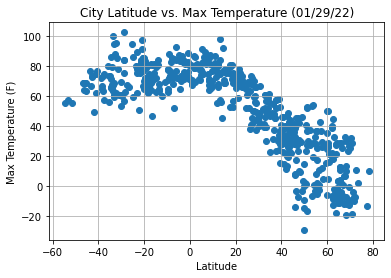

In [54]:
# Build a scatter plot for latitude vs. temperature 
plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], marker="o")

# Label axes and title and format time
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("spltlatvstemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

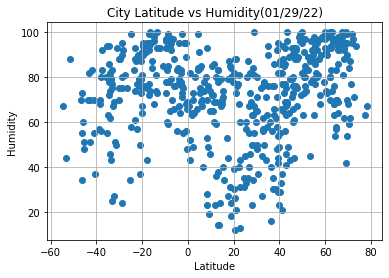

In [55]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("spltlatvshumidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

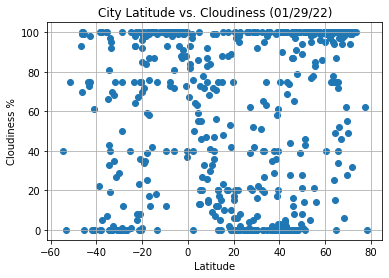

In [56]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("spltlatvsclouds.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

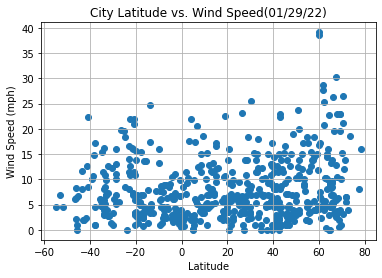

In [57]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("spltlatvswind.png")

# Show plot
plt.show()

## Linear Regression

In [58]:
# Split the data into Northern (lat >==0) and Southern Hemispheres (lat < 0)

northern_df = weather_df.loc[(weather_df["Latitude"]>=0)]
southern_df = weather_df.loc[(weather_df["Latitude"]<0)]


In [59]:
northern_df.count()

City          367
Country       367
Max Temp      367
Humidity      367
Cloudiness    367
Wind Speed    367
Latitude      367
Longitude     367
Date          367
dtype: int64

In [60]:
southern_df.count()

City          174
Country       174
Max Temp      174
Humidity      174
Cloudiness    174
Wind Speed    174
Latitude      174
Longitude     174
Date          174
dtype: int64

In [61]:
# Define the linear regression function along with the scatter plot for each graph

def line_regr(x_values, y_values, yaxis):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    # Scatter Plots    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    #plt.annotate(line_eq)
    print(f"The correlation coefficient is {rvalue}")
    print(f"The regression equation is {line_eq}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.8695809439239811
The regression equation is y = -1.25x + 88.09


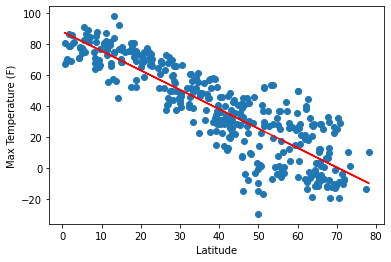

<Figure size 432x288 with 0 Axes>

In [62]:
# Call regression function for Northern Hemisphere - max temp vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
line_regr(x_values,y_values,'Max Temperature (F)')

plt.savefig("NHlatvstemp.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.28792903795880986
The regression equation is y = 0.22x + 78.22


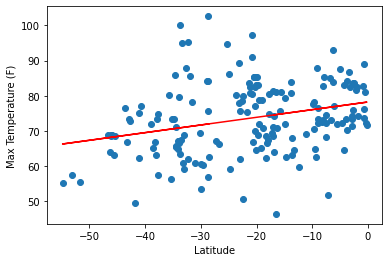

<Figure size 432x288 with 0 Axes>

In [63]:
# Call regression function for Southern Hemisphere - max temp vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
line_regr(x_values,y_values,'Max Temperature (F)')

plt.savefig("SHlatvstemp.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.4245576131481757
The regression equation is y = 0.45x + 53.59


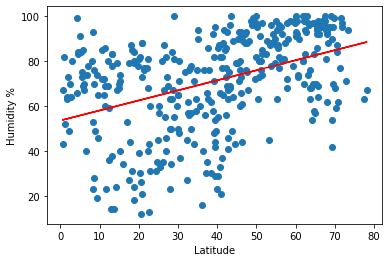

<Figure size 432x288 with 0 Axes>

In [64]:
# Call regression function for Northern Hemisphere - humidity vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
line_regr(x_values,y_values,'Humidity %')

plt.savefig("NHlatvshumidity.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.31605988760409137
The regression equation is y = 0.39x + 84.44


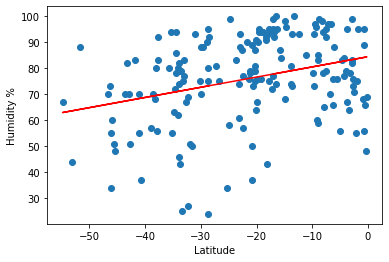

<Figure size 432x288 with 0 Axes>

In [65]:
# Call regression function for Southern Hemisphere - humidity vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
line_regr(x_values,y_values,'Humidity %')

plt.savefig("SHlatvshumidity.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.3526351303668092
The regression equation is y = 0.71x + 29.0


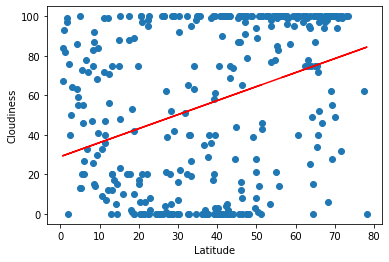

<Figure size 432x288 with 0 Axes>

In [66]:
# Call regression function for Northern Hemisphere - cloudiness vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
line_regr(x_values,y_values,'Cloudiness')

plt.savefig("NHlatvsclouds.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.4033790273626804
The regression equation is y = 1.17x + 89.13


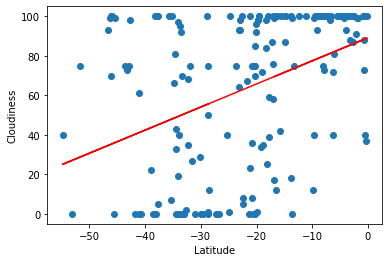

<Figure size 432x288 with 0 Axes>

In [67]:
# Call regression function for Southern Hemisphere - cloudiness vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
line_regr(x_values,y_values,'Cloudiness')

plt.savefig("SHlatvsclouds.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.1887920817653383
The regression equation is y = 0.06x + 6.09


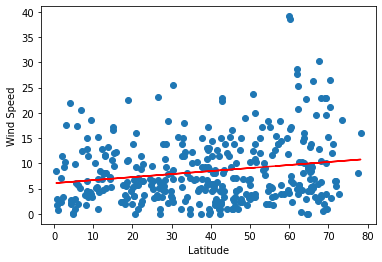

<Figure size 432x288 with 0 Axes>

In [68]:
# Call regression function for Northern Hemisphere - wind speed vs. latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
line_regr(x_values,y_values,'Wind Speed')

plt.savefig("NHlatvswind.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.1212845306743056
The regression equation is y = -0.05x + 6.2


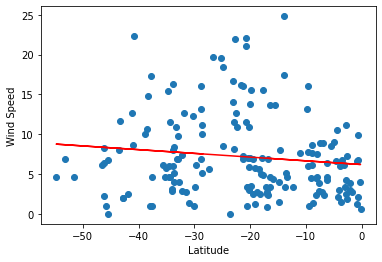

<Figure size 432x288 with 0 Axes>

In [69]:
# Call regression function for Southern Hemisphere - wind speed vs. latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
line_regr(x_values,y_values,'Wind Speed')

plt.savefig("SHlatvswind.png")
